In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-


from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from scipy.io import arff
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dummycl = DummyClassifier(strategy="most_frequent")
gmb = GaussianNB()
dectree = tree.DecisionTreeClassifier()
logreg = LogisticRegression(solver="liblinear")
svc = svm.SVC(gamma='scale')

data, meta = arff.loadarff("crx.arff")
df = pd.DataFrame(data)
print(df.dtypes)

A1        object
A2       float64
A3       float64
A4        object
A5        object
A6        object
A7        object
A8       float64
A9        object
A10       object
A11      float64
A12       object
A13       object
A14      float64
A15      float64
class     object
dtype: object


(array([307.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 383.]),
 array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
        0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
        0.90909091, 1.        ]),
 <a list of 11 Patch objects>)

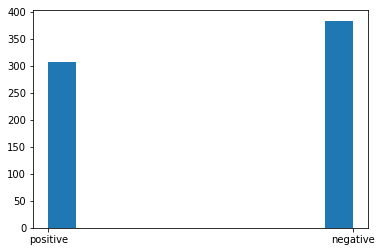

In [3]:
plt.hist(data['class'], bins='auto')

In [4]:
p=df.groupby(['class']).agg({'class':'count'})
p = d.divide(len(df['class']))*100

NameError: name 'd' is not defined

In [ ]:
d = df.loc[pd.isnull(df).any(axis=1)]
d

In [9]:
lst_classif = [dummycl, gmb, dectree, logreg, svc]
lst_classif_names = ['Dummy', 'Naive Bayes', 'Decision tree', 'Logistic regression', 'SVM']

In [10]:
def accuracy_score(lst_classif,lst_classif_names,X,y):
    for clf,name_clf in zip(lst_classif,lst_classif_names):
        scores = cross_val_score(clf, X, y, cv=5)
        print("Accuracy of "+name_clf+" classifier on cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

def confusion_matrix(lst_classif,lst_classif_names,X,y):
    for clf,name_clf in zip(lst_classif,lst_classif_names):
        predicted = cross_val_predict(clf, X, y, cv=5) 
        print("Accuracy of "+name_clf+" classifier on cross-validation: %0.2f" % metrics.accuracy_score(y, predicted))
        print(metrics.confusion_matrix(y, predicted))

In [44]:
# Replace missing values by mean and scale numeric values
data_num = df.select_dtypes(include='float64')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[data_num.columns] = imp_mean.fit_transform(data_num)
accuracy_score(lst_classif,lst_classif_names,data_num,df['class'].values)


# Replace missing values by mean and discretize categorical values
data_cat = df.select_dtypes(exclude='float64').drop('class',axis=1)'''

"imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')\ndata_num = imp_mean.fit_transform(data_num)\naccuracy_score(lst_classif,lst_classif_names,data_num,df['class'].values)\n\n\n# Replace missing values by mean and discretize categorical values\ndata_cat = df.select_dtypes(exclude='float64').drop('class',axis=1)"

,A2,A3,A8,A11,A14,A15
0,3083.0,0.0,125.0,1.0,202.0,0.0
1,5867.0,446.0,304.0,6.0,43.0,560.0
2,245.0,5.0,15.0,0.0,280.0,824.0
3,2783.0,154.0,375.0,5.0,100.0,3.0
4,2017.0,5625.0,171.0,0.0,120.0,0.0
5,3208.0,4.0,25.0,0.0,360.0,0.0
6,3317.0,104.0,65.0,0.0,164.0,31285.0
7,2292.0,11585.0,4.0,0.0,80.0,1349.0
8,5442.0,5.0,396.0,0.0,180.0,314.0
9,425.0,4915.0,3165.0,0.0,52.0,1442.0


In [34]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/d

In [53]:
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3